Impoting Libraries and Dataset

In [1]:
!pip install torch torchvision torchaudio scikit-learn pandas numpy matplotlib seaborn umap-learn

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for nice plots
plt.style.use('default')
sns.set_palette("husl")

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [3]:
df = pd.read_csv("/content/DNA_Dataset_Normalized.csv")  # Update path if needed

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)} total ({len(df.columns)-1} features + 1 label)")
print("\nFirst 3 rows:")
df.head(3)

Dataset loaded successfully!
Shape: (390, 45)
Columns: 45 total (44 features + 1 label)

First 3 rows:


,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.0,0.000000,2.759582,0.0,...,0.0,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000,1
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.0,1.972509,2.218967,0.0,...,0.0,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689,1
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.0,0.736562,3.543446,0.0,...,0.0,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785,1


In [4]:
print("Data types:")
print(df.dtypes.value_counts())
print("\nMissing values:")
print(df.isnull().sum().sum())  # Total missing
print("\nClass distribution:")
print(df["Class"].value_counts(normalize=True).round(3))

print("\nFeatures columns (first 10):")
feature_cols = [col for col in df.columns if col != "Class"]
print(feature_cols[:10])
print(f"\nTotal features: {len(feature_cols)} (gene_1 to gene_49)")


Data types:
float64    43
int64       2
Name: count, dtype: int64

Missing values:
0

Class distribution:
Class
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: proportion, dtype: float64

Features columns (first 10):
['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7', 'gene_10', 'gene_11', 'gene_12', 'gene_13']

Total features: 44 (gene_1 to gene_49)


In [5]:
df = pd.read_csv("/content/DNA_Dataset_Normalized.csv")

print(" Dataset loaded!")
print("=" * 50)
#Shape and basic info
print("Dataset shape (rows, columns):", df.shape)
print("\nColumn names (first 10):")
print(df.columns[:10].tolist())
print("\nColumn names (last 5):")
print(df.columns[-5:].tolist())
print("\nAll columns are numeric:", (df.dtypes == 'float64').all() or (df.dtypes == 'int64').all())

 Dataset loaded!
Dataset shape (rows, columns): (390, 45)

Column names (first 10):
['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7', 'gene_10', 'gene_11', 'gene_12', 'gene_13']

Column names (last 5):
['gene_46', 'gene_47', 'gene_48', 'gene_49', 'Class']

All columns are numeric: False


In [6]:
print("First 5 rows:")
df.head()

First 5 rows:


,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.0,0.000000,2.759582,0.0,...,0.0,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000,1
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.0,1.972509,2.218967,0.0,...,0.0,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689,1
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.0,0.736562,3.543446,0.0,...,0.0,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785,1
3,3.667699,3.083179,7.997292,9.516886,7.925424,0.732486,0.0,0.000000,3.762157,0.0,...,0.0,0.000000,0.000000,0.000000,7.258726,10.100321,9.391772,11.355979,0.000000,1
4,3.821935,3.717605,7.593100,10.205964,7.613185,0.000000,0.0,0.000000,1.982364,0.0,...,0.0,0.000000,0.000000,2.261441,8.054105,10.471025,8.439449,11.730143,0.000000,1


In [7]:
print("Missing values per column:")
missing = df.isnull().sum()
print(missing[missing > 0]) if missing.sum() > 0 else print(" No missing values!")

print("\nData types:")
print(df.dtypes.value_counts())

print("\nDataset info summary:")
print(df.info(memory_usage='deep'))

Missing values per column:
 No missing values!

Data types:
float64    43
int64       2
Name: count, dtype: int64

Dataset info summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 45 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gene_1   390 non-null    float64
 1   gene_2   390 non-null    float64
 2   gene_3   390 non-null    float64
 3   gene_4   390 non-null    float64
 4   gene_6   390 non-null    float64
 5   gene_7   390 non-null    float64
 6   gene_10  390 non-null    float64
 7   gene_11  390 non-null    float64
 8   gene_12  390 non-null    float64
 9   gene_13  390 non-null    float64
 10  gene_14  390 non-null    float64
 11  gene_17  390 non-null    float64
 12  gene_18  390 non-null    float64
 13  gene_19  390 non-null    float64
 14  gene_20  390 non-null    float64
 15  gene_21  390 non-null    float64
 16  gene_22  390 non-null    float64
 17  gene_23  390 non-null    int64 

Class distribution:
Class
1    78
2    78
3    78
4    78
5    78
Name: count, dtype: int64

Proportions:
Class
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: count, dtype: float64


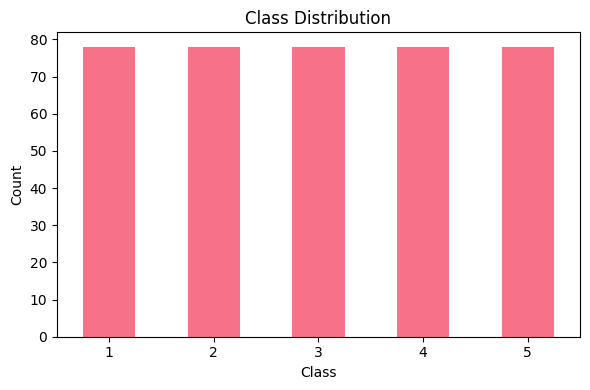

In [8]:
print("Class distribution:")
class_counts = df['Class'].value_counts()
print(class_counts)
print("\nProportions:")
print((class_counts / len(df)).round(3))

# Quick bar plot
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
# Feature summary
feature_cols = [col for col in df.columns if col != 'Class']
print(f" Features identified: {len(feature_cols)} genes")
print("Sample feature names:", feature_cols[:5], "...", feature_cols[-3:])

print("\nQuick stats for first 5 genes:")
print(df[feature_cols[:5]].describe().round(2))


 Features identified: 44 genes
Sample feature names: ['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6'] ... ['gene_47', 'gene_48', 'gene_49']

Quick stats for first 5 genes:
       gene_1  gene_2  gene_3  gene_4  gene_6
count  390.00  390.00  390.00  390.00  390.00
mean     3.03    3.19    6.83    9.79    7.33
std      1.25    1.05    0.74    0.50    1.03
min      0.00    0.00    5.01    8.44    4.53
25%      2.34    2.49    6.35    9.44    6.62
50%      3.17    3.22    6.74    9.76    7.43
75%      3.86    3.84    7.16   10.13    8.00
max      6.24    5.85   10.13   11.27   10.22


Explanatory Data Analysis

Class counts:
Class
1    78
2    78
3    78
4    78
5    78
Name: count, dtype: int64

Class proportions:
Class
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: count, dtype: float64


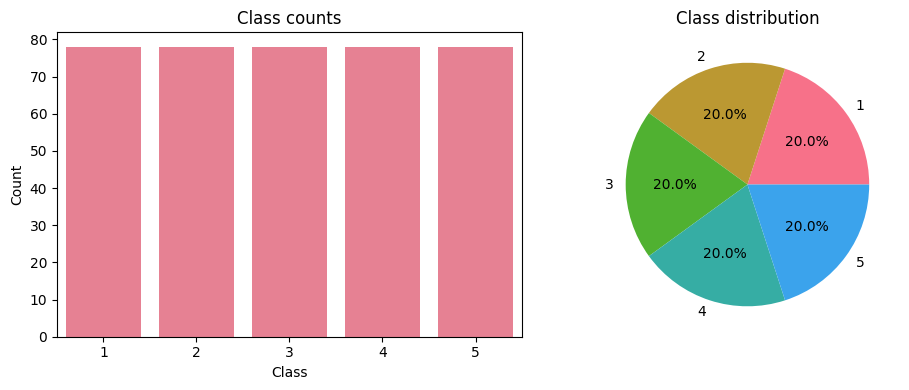

In [10]:
class_counts = df["Class"].value_counts().sort_index()
class_props = (class_counts / len(df)).round(3)

print("Class counts:")
print(class_counts)
print("\nClass proportions:")
print(class_props)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values)
plt.title("Class counts")
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index.astype(str), autopct="%1.1f%%")
plt.title("Class distribution")

plt.tight_layout()
plt.show()

In [11]:
#summary statistics per gene
feature_cols = [c for c in df.columns if c != "Class"]

stats_df = df[feature_cols].describe().T  # rows = genes
stats_df = stats_df[["mean", "std", "min", "max"]]
print(f"Summary statistics for {len(feature_cols)} genes (showing top 10):")
stats_df.head(10).round(3)

Summary statistics for 44 genes (showing top 10):


,mean,std,min,max
gene_1,3.026,1.246,0.000,6.237
gene_2,3.193,1.049,0.000,5.848
gene_3,6.835,0.737,5.009,10.130
gene_4,9.786,0.497,8.436,11.269
gene_6,7.330,1.032,4.534,10.219
gene_7,0.483,0.514,0.000,2.779
gene_10,0.664,1.096,0.000,8.497
gene_11,0.905,0.903,0.000,7.884
gene_12,2.654,0.694,0.519,4.658
gene_13,0.233,0.580,0.000,5.548


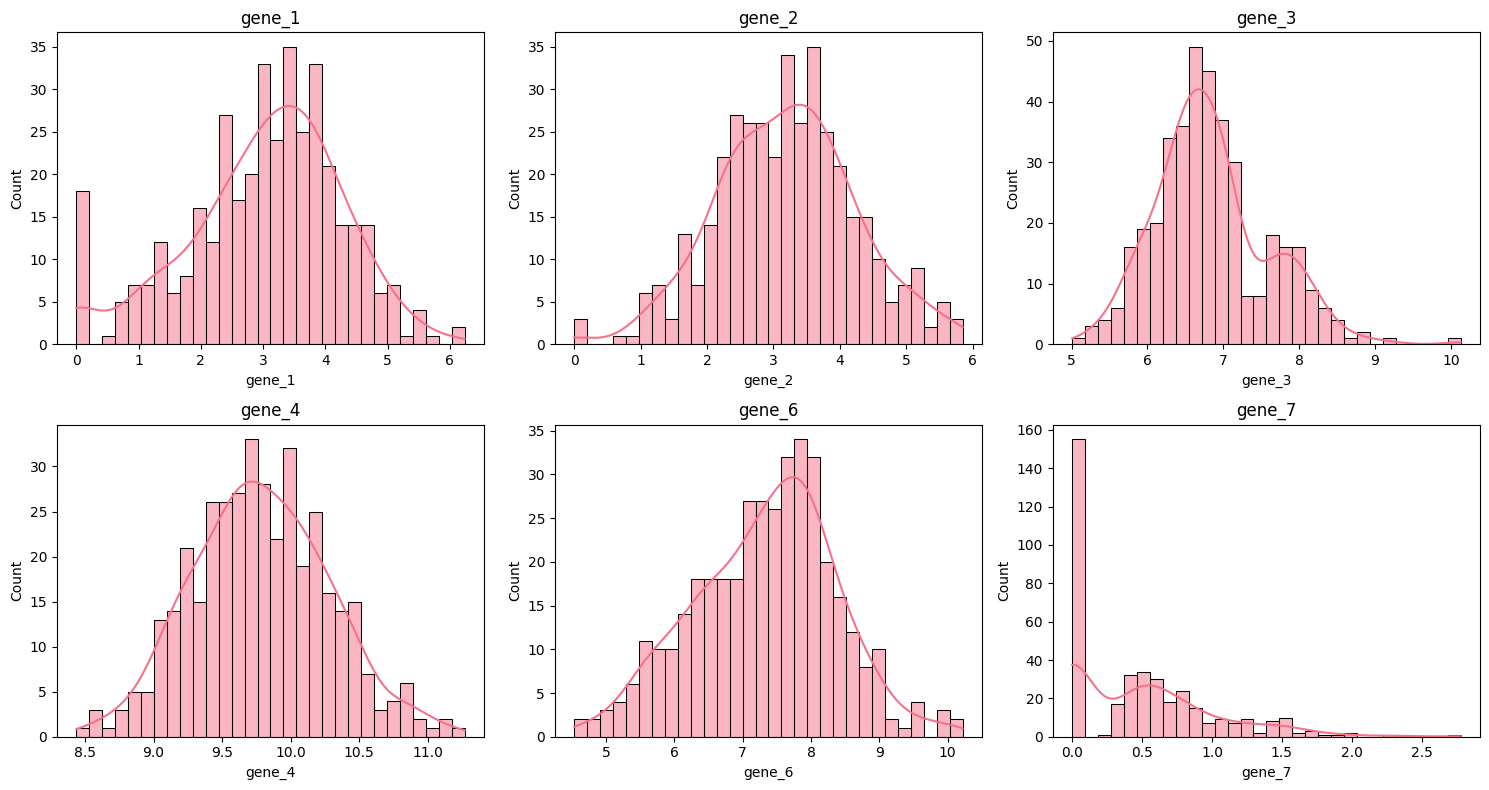

In [12]:
# Histograms / KDE for a few genes
# Choose some representative genes (you can change this list)
example_genes = feature_cols[:6]  # first 6 genes

plt.figure(figsize=(15, 8))
for i, gene in enumerate(example_genes, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[gene], kde=True, bins=30)
    plt.title(gene)
plt.tight_layout()
plt.show()


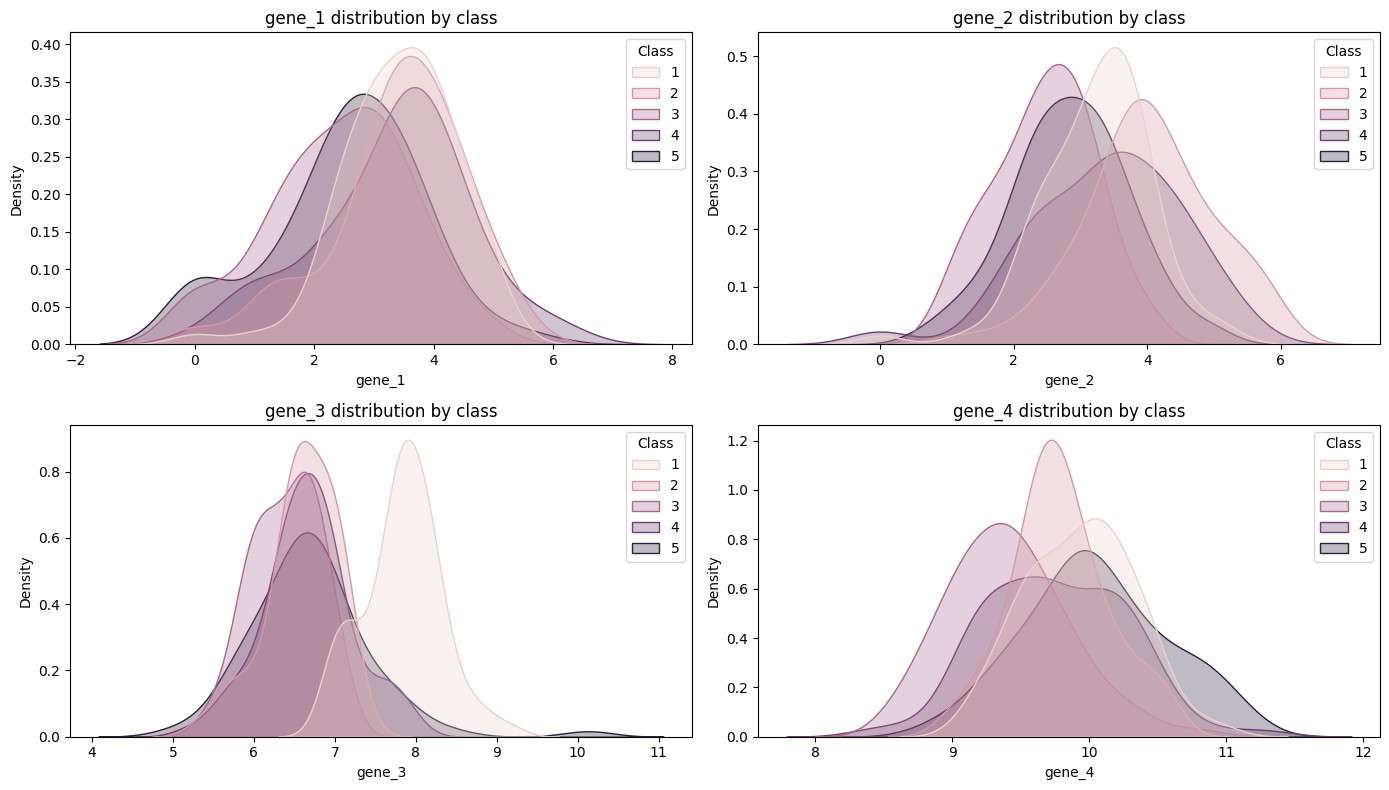

In [13]:
# Per-class distributions for selected genes
# Pick a few potentially important genes
selected_genes = feature_cols[:4]  # change if you want specific genes

plt.figure(figsize=(14, 8))
for i, gene in enumerate(selected_genes, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=gene, hue="Class", common_norm=False, fill=True, alpha=0.3)
    plt.title(f"{gene} distribution by class")
plt.tight_layout()
plt.show()


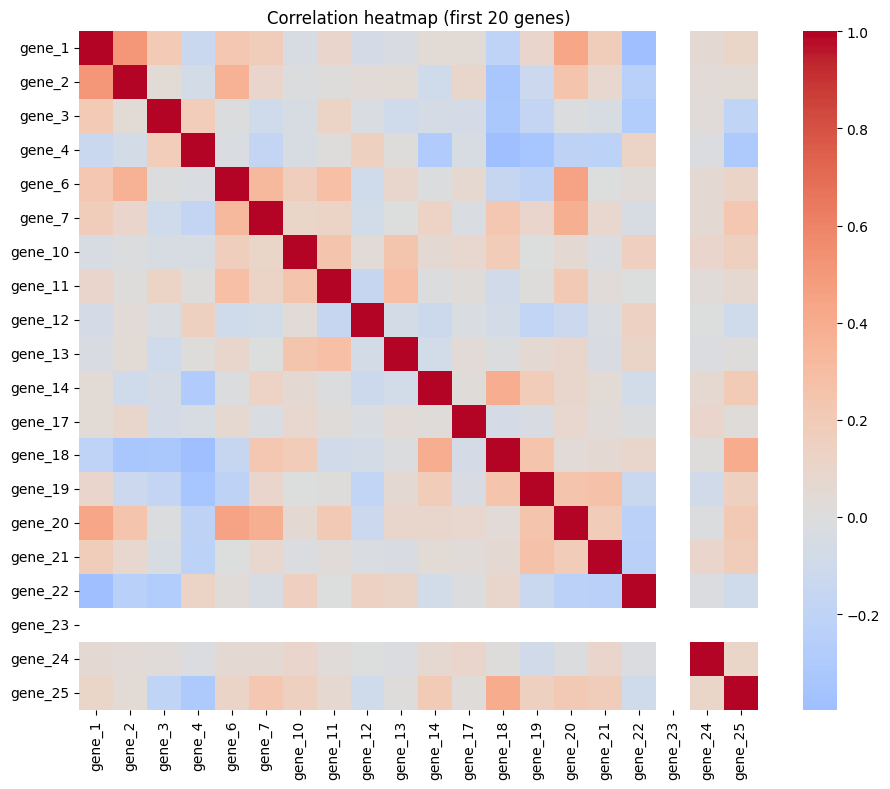

In [14]:
# Correlation heatmap (subset of genes)
# For readability, use a subset (e.g., first 20 genes)
subset_genes = feature_cols[:20]
corr = df[subset_genes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True)
plt.title("Correlation heatmap (first 20 genes)")
plt.tight_layout()
plt.show()

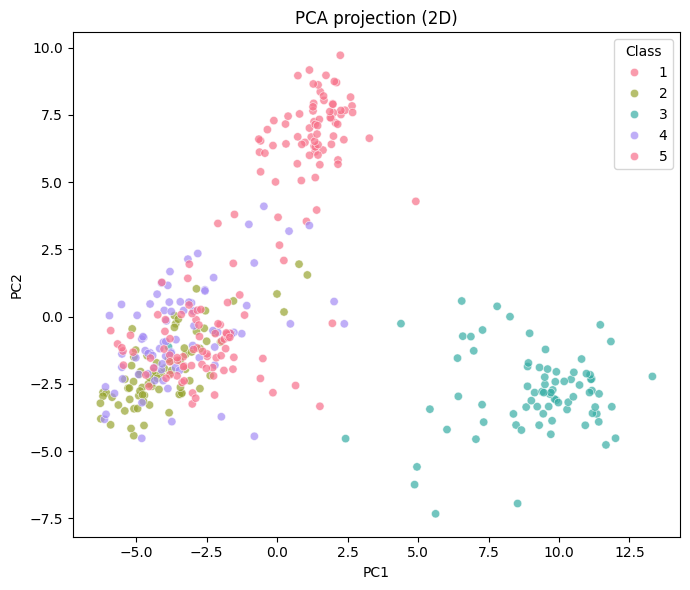

Explained variance ratio: [0.30458003 0.15684686]


In [15]:
# PCA 2D scatter colored by class
from sklearn.decomposition import PCA

X_all = df[feature_cols].values
y_all = df["Class"].values

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_all)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Class": y_all
})

plt.figure(figsize=(7, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Class", alpha=0.7, palette="husl")
plt.title("PCA projection (2D)")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

Data Pre-Processing

In [16]:
#Separate features X and labels y
feature_cols = [col for col in df.columns if col != "Class"]
label_col = "Class"

X = df[feature_cols].values  # Shape: (n_samples, n_features)
y = df[label_col].values     # Shape: (n_samples,)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"y unique values: {np.unique(y)}")
print(f"Features range: {X.min():.2f} to {X.max():.2f}")

X shape: (390, 44)
y shape: (390,)
y unique values: [1 2 3 4 5]
Features range: 0.00 to 17.37


Normalization check:
- Min values per feature: 0.0 to 9.710344973
- Max values per feature: 0.0 to 17.36587813
- Mean: 4.115 ± Std: 4.172
- All values ≥ 0: True


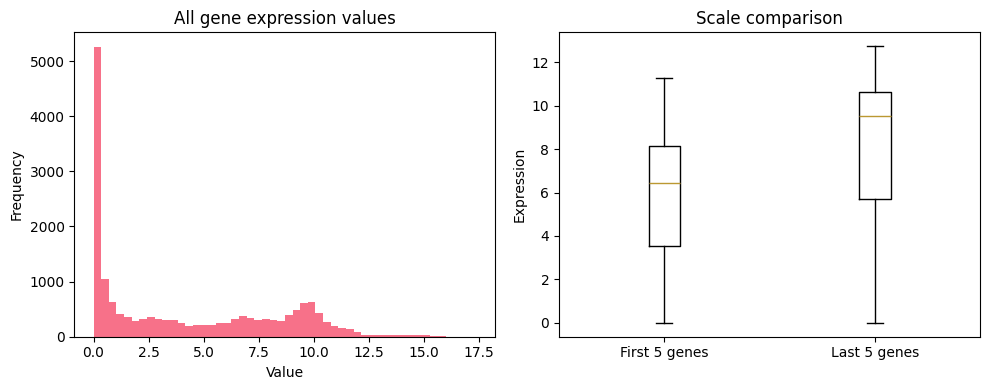

In [17]:
# Verify normalization/scale
print("Normalization check:")
print("- Min values per feature:", X.min(axis=0).min(), "to", X.min(axis=0).max())
print("- Max values per feature:", X.max(axis=0).min(), "to", X.max(axis=0).max())
print("- Mean:", X.mean().round(3), "± Std:", X.std().round(3))
print("- All values ≥ 0:", (X >= 0).all())

# Quick scale plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(X.flatten(), bins=50)
plt.title("All gene expression values")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.boxplot([X[:, :5].flatten(), X[:, -5:].flatten()],
           labels=["First 5 genes", "Last 5 genes"])
plt.title("Scale comparison")
plt.ylabel("Expression")
plt.tight_layout()
plt.show()

In [18]:
# Train/Val/Test split with stratification
test_size = 0.2
val_size = 0.15

# First split: train + temp vs test
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

# Second split: train vs val
val_ratio = val_size / (1 - test_size)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=val_ratio, random_state=42, stratify=y_train_temp
)

print(f"Train: {X_train.shape[0]} samples ({len(X_train[0])} features)")
print(f"Val:   {X_val.shape[0]} samples")
print(f"Test:  {X_test.shape[0]} samples")
print("\nTrain class distribution:", np.bincount(y_train))
print("Val class distribution:",   np.bincount(y_val))
print("Test class distribution:",  np.bincount(y_test))

Train: 253 samples (44 features)
Val:   59 samples
Test:  78 samples

Train class distribution: [ 0 51 51 50 50 51]
Val class distribution: [ 0 11 12 12 12 12]
Test class distribution: [ 0 16 15 16 16 15]


In [19]:
# Convert to proper NumPy dtypes
# PyTorch prefers float32 for X, int64 for y (classification labels)
X_train = X_train.astype(np.float32)
X_val   = X_val.astype(np.float32)
X_test  = X_test.astype(np.float32)

# Fix labels [1,2,3,4,5] → [0,1,2,3,4] for PyTorch
unique_classes = sorted(np.unique(np.concatenate([y_train, y_val, y_test])))
class_map = {cls: i for i, cls in enumerate(unique_classes)}
print("Class mapping:", class_map)

y_train = np.array([class_map[label] for label in y_train]).astype(np.int64)
y_val   = np.array([class_map[label] for label in y_val]).astype(np.int64)
y_test  = np.array([class_map[label] for label in y_test]).astype(np.int64)

print("Dtypes + labels fixed!")
print(f"X_train: {X_train.shape} {X_train.dtype}")
print(f"y_train: {y_train.shape} {y_train.dtype}, unique: {np.unique(y_train)}")
print("Ready for PyTorch Dataset!")

Class mapping: {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4}
Dtypes + labels fixed!
X_train: (253, 44) float32
y_train: (253,) int64, unique: [0 1 2 3 4]
Ready for PyTorch Dataset!


In [20]:
# Custom PyTorch Dataset class
class GeneExpressionDataset(Dataset):
    """
    Custom Dataset for gene expression data.
    Expects X: (n_samples, n_features) float32
            y: (n_samples,) int64 labels
    """
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)  # long = int64 for classification

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = GeneExpressionDataset(X_train, y_train)
val_dataset   = GeneExpressionDataset(X_val, y_val)
test_dataset  = GeneExpressionDataset(X_test, y_test)

print(f"Datasets created:")
print(f"  Train: {len(train_dataset)} samples")
print(f"  Val:   {len(val_dataset)} samples")
print(f"  Test:  {len(test_dataset)} samples")
print(f"  X shape: {train_dataset[0][0].shape}")
print(f"  y shape: {train_dataset[0][1].shape}")

Datasets created:
  Train: 253 samples
  Val:   59 samples
  Test:  78 samples
  X shape: torch.Size([44])
  y shape: torch.Size([])


In [21]:
# Cell 6B: Create DataLoaders
batch_size = 64  # Adjust based on your GPU/memory

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,      # Shuffle training data
    num_workers=2,     # Parallel data loading (Colab: 0-2)
    pin_memory=True    # Faster GPU transfer
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

print(f"DataLoaders ready (batch_size={batch_size}):")
print(f"  Train batches: {len(train_loader)}")
print(f"  Val batches:   {len(val_loader)}")
print(f"  Test batches:  {len(test_loader)}")

DataLoaders ready (batch_size=64):
  Train batches: 4
  Val batches:   1
  Test batches:  2


In [22]:
#Verify DataLoader works
# Test one batch from each loader
print("Sample batch shapes:")
for name, loader in [("train", train_loader), ("val", val_loader)]:
    for X_batch, y_batch in loader:
        print(f"  {name} - X: {X_batch.shape}, y: {y_batch.shape}")
        print(f"    X dtype: {X_batch.dtype}, y dtype: {y_batch.dtype}")
        print(f"    X range: [{X_batch.min():.2f}, {X_batch.max():.2f}]")
        print(f"    y unique: {torch.unique(y_batch)}")
        break  # first batch

Sample batch shapes:
  train - X: torch.Size([64, 44]), y: torch.Size([64])
    X dtype: torch.float32, y dtype: torch.int64
    X range: [0.00, 17.37]
    y unique: tensor([0, 1, 2, 3, 4])
  val - X: torch.Size([59, 44]), y: torch.Size([59])
    X dtype: torch.float32, y dtype: torch.int64
    X range: [0.00, 16.97]
    y unique: tensor([0, 1, 2, 3, 4])


Baseline Deep Learning Modelling(MLP)

In [23]:
# MLP Classifier Model
class MLPClassifier(nn.Module):
    """
    Multi-layer perceptron for gene expression classification.
    Input: 44 genes -> Hidden layers -> 5 classes
    """
    def __init__(self, input_dim=44, num_classes=5, hidden_dims=[256, 128, 64]):
        super().__init__()
        layers = []

        # Input layer
        layers.extend([
            nn.Linear(input_dim, hidden_dims[0]),
            nn.BatchNorm1d(hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout(0.3)
        ])

        # Hidden layers
        for i in range(len(hidden_dims)-1):
            layers.extend([
                nn.Linear(hidden_dims[i], hidden_dims[i+1]),
                nn.BatchNorm1d(hidden_dims[i+1]),
                nn.ReLU(),
                nn.Dropout(0.3)
            ])

        # Output layer (no activation - use CrossEntropyLoss)
        layers.append(nn.Linear(hidden_dims[-1], num_classes))

        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# Create model
num_features = X_train.shape[1]  # 44
num_classes = len(np.unique(y_train))  # 5

model = MLPClassifier(input_dim=num_features, num_classes=num_classes).to(device)
total_params = sum(p.numel() for p in model.parameters())
print(f"MLP model created:")
print(f"  Input dim: {num_features}, Output classes: {num_classes}")
print(f"  Total params: {total_params:,}")
print(model)

MLP model created:
  Input dim: 44, Output classes: 5
  Total params: 53,893
MLPClassifier(
  (net): Sequential(
    (0): Linear(in_features=44, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=5, bias=True)
  )
)


In [24]:
#  Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Perfect for multi-class
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=0.001,
    weight_decay=1e-4  # L2 regularization
)

print(" Loss:", criterion)
print("Optimizer:", optimizer)
print(f"  Learning rate: 0.001")

 Loss: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
)
  Learning rate: 0.001


In [25]:
#  Quick model test
model.eval()
with torch.no_grad():
    sample_batch = next(iter(train_loader))
    X_sample, y_sample = sample_batch[0].to(device), sample_batch[1].to(device)

    logits = model(X_sample)
    probs = torch.softmax(logits, dim=1)

    print("Model forward pass test:")
    print(f"  Input batch: {X_sample.shape}")
    print(f"  Logits:      {logits.shape}")
    print(f"  Probs:       {probs.shape}")
    print(f"  Sample probs:\n{probs[:3]}")

Model forward pass test:
  Input batch: torch.Size([64, 44])
  Logits:      torch.Size([64, 5])
  Probs:       torch.Size([64, 5])
  Sample probs:
tensor([[0.1785, 0.1896, 0.1352, 0.2625, 0.2342],
        [0.1839, 0.1727, 0.1364, 0.2534, 0.2537],
        [0.1731, 0.1821, 0.1418, 0.2629, 0.2401]])


Training Model

In [26]:
# Training function
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    all_preds, all_labels = [], []

    for X_batch, y_batch in loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()

        # Gradient clipping (prevents exploding gradients)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        total_loss += loss.item() * len(X_batch)
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

    avg_loss = total_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    return avg_loss, acc

In [27]:
# Validation/Evaluation function
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    all_preds, all_labels, all_probs = [], [], []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            total_loss += loss.item() * len(X_batch)

            probs = torch.softmax(logits, dim=1)
            preds = torch.argmax(probs, dim=1)

            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    avg_loss = total_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)

    # Multi-class ROC-AUC (one-vs-rest)
    try:
        auc = roc_auc_score(all_labels, all_probs, multi_class='ovr', average='macro')
    except:
        auc = 0.0

    return avg_loss, acc, auc

In [28]:
# Main training loop
num_epochs = 100  # We'll use early stopping
patience = 15
best_val_acc = 0.0
epochs_no_improve = 0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

print("Epoch | Train Loss/Acc | Val Loss/Acc/AUC | Status")
print("-" * 50)

for epoch in range(1, num_epochs + 1):
    # Train
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)

    # Validate
    val_loss, val_acc, val_auc = evaluate(model, val_loader, criterion, device)

    # Track metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    # Early stopping + best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        epochs_no_improve = 0
        status = "NEW BEST!"
    else:
        epochs_no_improve += 1
        status = f"No improve ({epochs_no_improve}/{patience})"

    print(f"{epoch:3d}   | {train_loss:.4f}/{train_acc:.4f} | "
          f"{val_loss:.4f}/{val_acc:.4f}/{val_auc:.4f} | {status}")

    # Early stopping
    if epochs_no_improve >= patience:
        print(f"\nEarly stopping at epoch {epoch}")
        break

print(f"\nTraining complete! Best val acc: {best_val_acc:.4f}")

Epoch | Train Loss/Acc | Val Loss/Acc/AUC | Status
--------------------------------------------------
  1   | 1.5100/0.3518 | 1.4840/0.3559/0.9088 | NEW BEST!
  2   | 1.1334/0.7312 | 1.3140/0.6780/0.9588 | NEW BEST!
  3   | 0.9444/0.8340 | 1.1037/0.8814/0.9762 | NEW BEST!
  4   | 0.7883/0.8775 | 0.8599/0.8983/0.9844 | NEW BEST!
  5   | 0.6611/0.9012 | 0.6661/0.8983/0.9876 | No improve (1/15)
  6   | 0.5850/0.9249 | 0.5319/0.8983/0.9887 | No improve (2/15)
  7   | 0.4839/0.9170 | 0.4502/0.8983/0.9904 | No improve (3/15)
  8   | 0.4277/0.9407 | 0.3990/0.9153/0.9918 | NEW BEST!
  9   | 0.3875/0.9486 | 0.3567/0.9153/0.9926 | No improve (1/15)
 10   | 0.3292/0.9565 | 0.3266/0.9153/0.9933 | No improve (2/15)
 11   | 0.3133/0.9486 | 0.3035/0.9153/0.9940 | No improve (3/15)
 12   | 0.2610/0.9763 | 0.2791/0.9153/0.9947 | No improve (4/15)
 13   | 0.2215/0.9842 | 0.2572/0.9322/0.9947 | NEW BEST!
 14   | 0.2021/0.9842 | 0.2455/0.9322/0.9954 | No improve (1/15)
 15   | 0.2109/0.9684 | 0.2319/0.932

Final Evaluation

In [29]:
#  Load best model & test evaluation
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

print("Best model loaded!")

# Fixed: evaluate returns only loss, acc, auc
test_loss, test_acc, test_auc = evaluate(model, test_loader, criterion, device)

# Get predictions for reports (separate call)
model.eval()
y_true, y_pred, y_prob = [], [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        logits = model(X_batch)
        probs = torch.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)

        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_prob.extend(probs.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

print("\n" + "="*60)
print("FINAL TEST RESULTS")
print("="*60)
print(f"Test Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test ROC-AUC:  {test_auc:.4f}")
print("="*60)


Best model loaded!

FINAL TEST RESULTS
Test Loss:     0.2563
Test Accuracy: 0.8974
Test ROC-AUC:  0.9943


In [30]:
#  Classification Report
print("📊 CLASSIFICATION REPORT (Test Set)")
print(classification_report(y_true, y_pred,
                          target_names=[f"Class_{i}" for i in sorted(np.unique(y_true))]))

📊 CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

     Class_0       0.94      1.00      0.97        16
     Class_1       1.00      0.87      0.93        15
     Class_2       0.94      1.00      0.97        16
     Class_3       0.92      0.69      0.79        16
     Class_4       0.74      0.93      0.82        15

    accuracy                           0.90        78
   macro avg       0.91      0.90      0.90        78
weighted avg       0.91      0.90      0.90        78



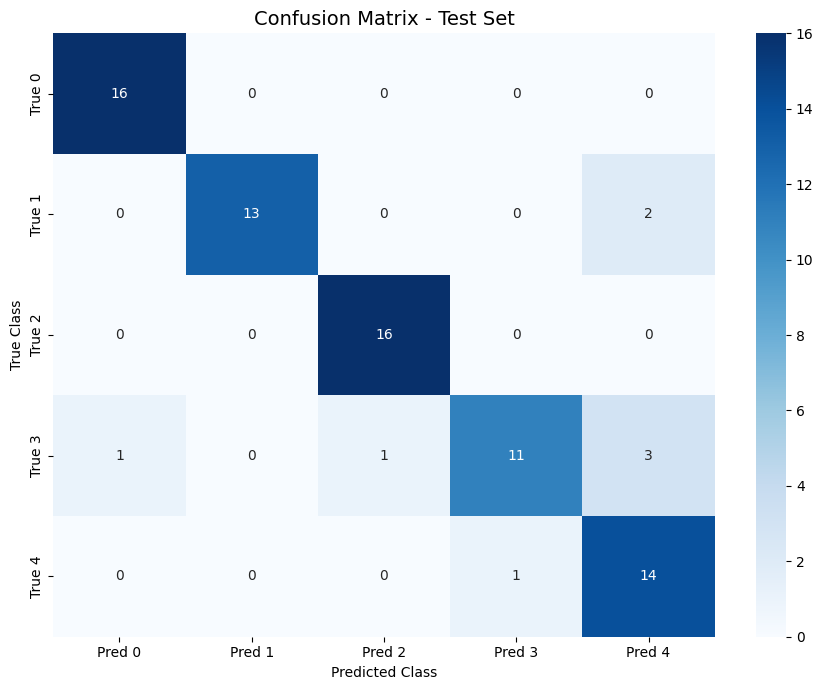

Raw confusion matrix:
[[16  0  0  0  0]
 [ 0 13  0  0  2]
 [ 0  0 16  0  0]
 [ 1  0  1 11  3]
 [ 0  0  0  1 14]]


In [31]:
#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = sorted(np.unique(y_true))

plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=[f"Pred {i}" for i in class_names],
            yticklabels=[f"True {i}" for i in class_names])
plt.title('Confusion Matrix - Test Set', fontsize=14)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()

print("Raw confusion matrix:")
print(cm)

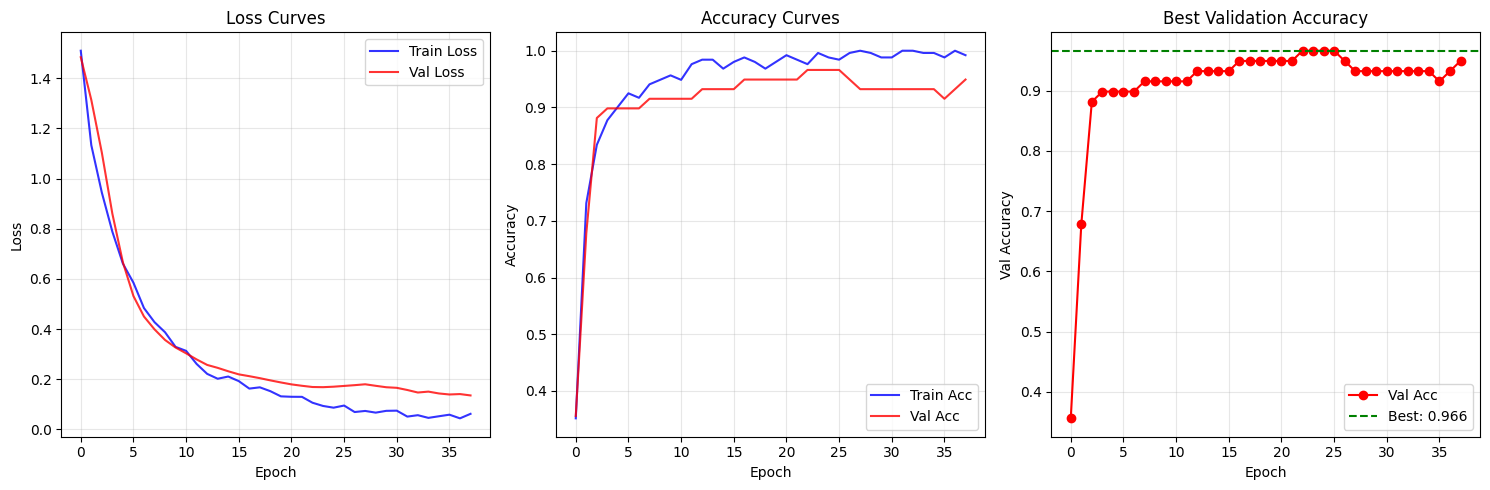

In [32]:
# Training Curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, 'b-', alpha=0.8, label='Train Loss')
plt.plot(val_losses, 'r-', alpha=0.8, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(train_accs, 'b-', alpha=0.8, label='Train Acc')
plt.plot(val_accs, 'r-', alpha=0.8, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(val_accs, 'ro-', label='Val Acc')
plt.axhline(y=max(val_accs), color='g', linestyle='--',
           label=f'Best: {max(val_accs):.3f}')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.title('Best Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
#  Performance Summary
print("\n" + "═"*70)
print("🎉 FINAL MODEL PERFORMANCE SUMMARY")
print("═"*70)
print(f"📊 Test Accuracy:  {test_acc:.1%} ({test_acc:.4f})")
print(f"📈 Test ROC-AUC:   {test_auc:.4f}")
print(f"⭐  Best Val Acc:  {max(val_accs):.4f}")
print(f"🔢 Classes:        {len(np.unique(y_true))} ({sorted(np.unique(y_true))})")
print(f"🧬 Features:       {X_test.shape[1]} genes")
print(f"⚙️  Parameters:    {sum(p.numel() for p in model.parameters()):,}")
print(f"⏱️  Epochs trained: {len(train_losses)}")
print("═"*70)

# Save results
results = {
    'test_acc': test_acc,
    'test_auc': test_auc,
    'best_val_acc': max(val_accs),
    'num_classes': len(np.unique(y_true)),
    'num_features': X_test.shape[1]
}
print("\n Results saved in 'results' dict")


══════════════════════════════════════════════════════════════════════
🎉 FINAL MODEL PERFORMANCE SUMMARY
══════════════════════════════════════════════════════════════════════
📊 Test Accuracy:  89.7% (0.8974)
📈 Test ROC-AUC:   0.9943
⭐  Best Val Acc:  0.9661
🔢 Classes:        5 ([np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)])
🧬 Features:       44 genes
⚙️  Parameters:    53,893
⏱️  Epochs trained: 38
══════════════════════════════════════════════════════════════════════

 Results saved in 'results' dict


Feature Importance and Explainability

In [34]:
# Gradient-based Feature Importance
"""
Saliency maps: Compute gradient of model's prediction w.r.t. input features
Higher gradient magnitude = more important feature for that prediction
"""
model.eval()

# Use test set for importance
X_importance = torch.tensor(X_test[:500], dtype=torch.float32).to(device)  # First 500
X_importance.requires_grad_(True)

# Forward pass
logits = model(X_importance)
pred_classes = torch.argmax(logits, dim=1)
selected_logits = logits[torch.arange(len(logits)), pred_classes]

# Backward pass (gradients w.r.t. input)
model.zero_grad()
selected_logits.sum().backward()

# Absolute gradients = feature importance
grad_importance = X_importance.grad.detach().cpu().abs().numpy()
print(f" Saliency computed for {grad_importance.shape[0]} samples × {grad_importance.shape[1]} genes")

 Saliency computed for 78 samples × 44 genes


TOP 15 MOST IMPORTANT GENES:
       gene  importance
38  gene_44      0.2068
40  gene_46      0.1782
22  gene_28      0.1651
39  gene_45      0.1524
24  gene_30      0.1371
1    gene_2      0.1370
32  gene_38      0.1357
12  gene_18      0.1356
31  gene_37      0.1332
14  gene_20      0.1288
23  gene_29      0.1255
25  gene_31      0.1207
20  gene_26      0.1206
35  gene_41      0.1177
29  gene_35      0.1141


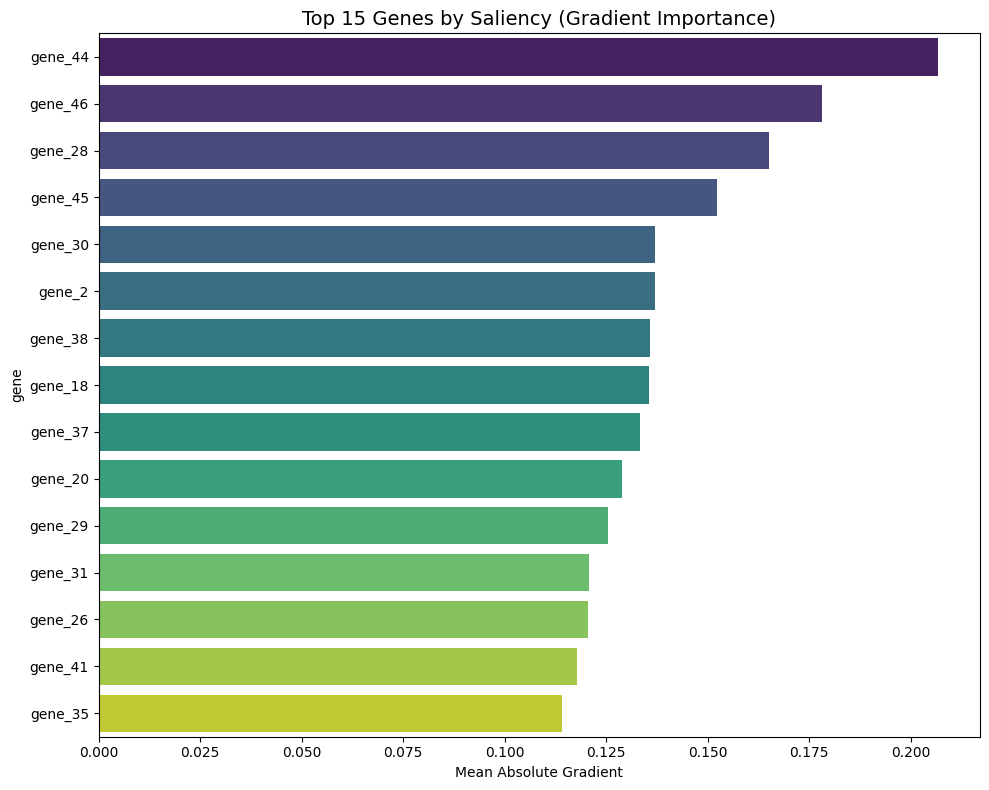

In [35]:
#  Aggregate & Top-K genes
# Mean importance across all samples
mean_importance = grad_importance.mean(axis=0)

# Create ranked dataframe
importance_df = pd.DataFrame({
    'gene': feature_cols,
    'importance': mean_importance
}).sort_values('importance', ascending=False)

top_k = 15
top_genes = importance_df.head(top_k)

print("TOP 15 MOST IMPORTANT GENES:")
print(top_genes.round(4))

plt.figure(figsize=(10, 8))
sns.barplot(data=top_genes, y='gene', x='importance', orient='h', palette='viridis')
plt.title(f'Top {top_k} Genes by Saliency (Gradient Importance)', fontsize=14)
plt.xlabel('Mean Absolute Gradient')
plt.tight_layout()
plt.show()

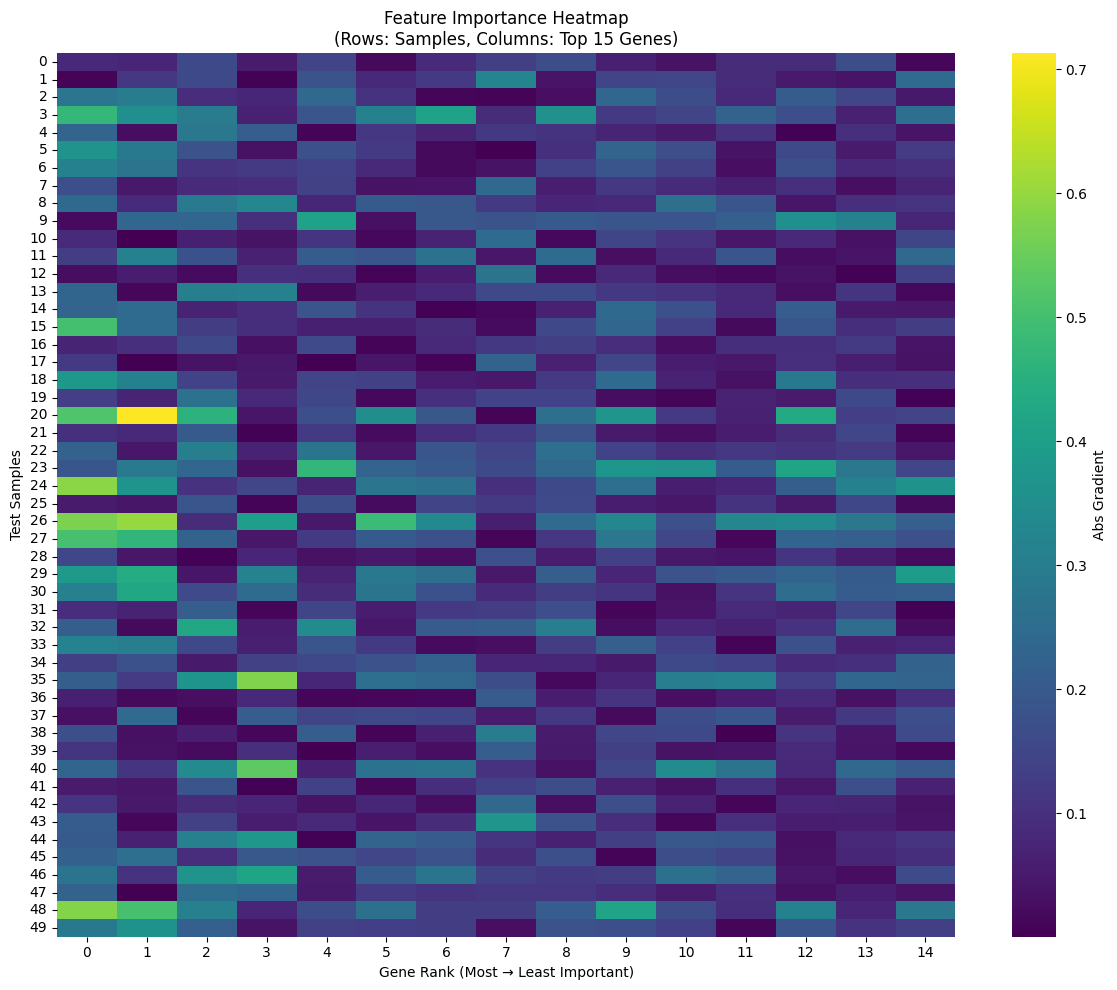

In [36]:
# Importance Heatmap
n_samples = 50
top_gene_indices = importance_df.head(15).index

plt.figure(figsize=(12, 10))
sns.heatmap(grad_importance[:n_samples, top_gene_indices],
            cmap='viridis', cbar_kws={'label': 'Abs Gradient'})
plt.title('Feature Importance Heatmap\n(Rows: Samples, Columns: Top 15 Genes)')
plt.xlabel('Gene Rank (Most → Least Important)')
plt.ylabel('Test Samples')
plt.tight_layout()
plt.show()


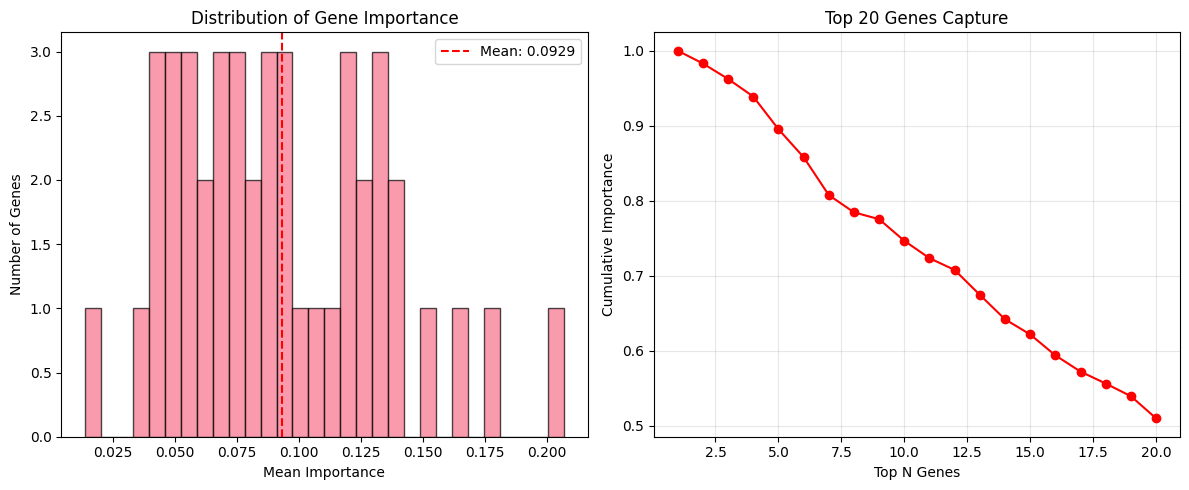

Top 10 genes capture: 74.6% of total importance


In [37]:
#  Gene importance distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(mean_importance, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Mean Importance')
plt.ylabel('Number of Genes')
plt.title('Distribution of Gene Importance')
plt.axvline(mean_importance.mean(), color='r', linestyle='--',
           label=f'Mean: {mean_importance.mean():.4f}')
plt.legend()

plt.subplot(1, 2, 2)
cumulative = np.cumsum(mean_importance)[::-1][:20] / mean_importance.sum()
plt.plot(range(1, 21), cumulative, 'ro-')
plt.xlabel('Top N Genes')
plt.ylabel('Cumulative Importance')
plt.title('Top 20 Genes Capture')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Top 10 genes capture: {cumulative[9]:.1%} of total importance")

Result Visualization

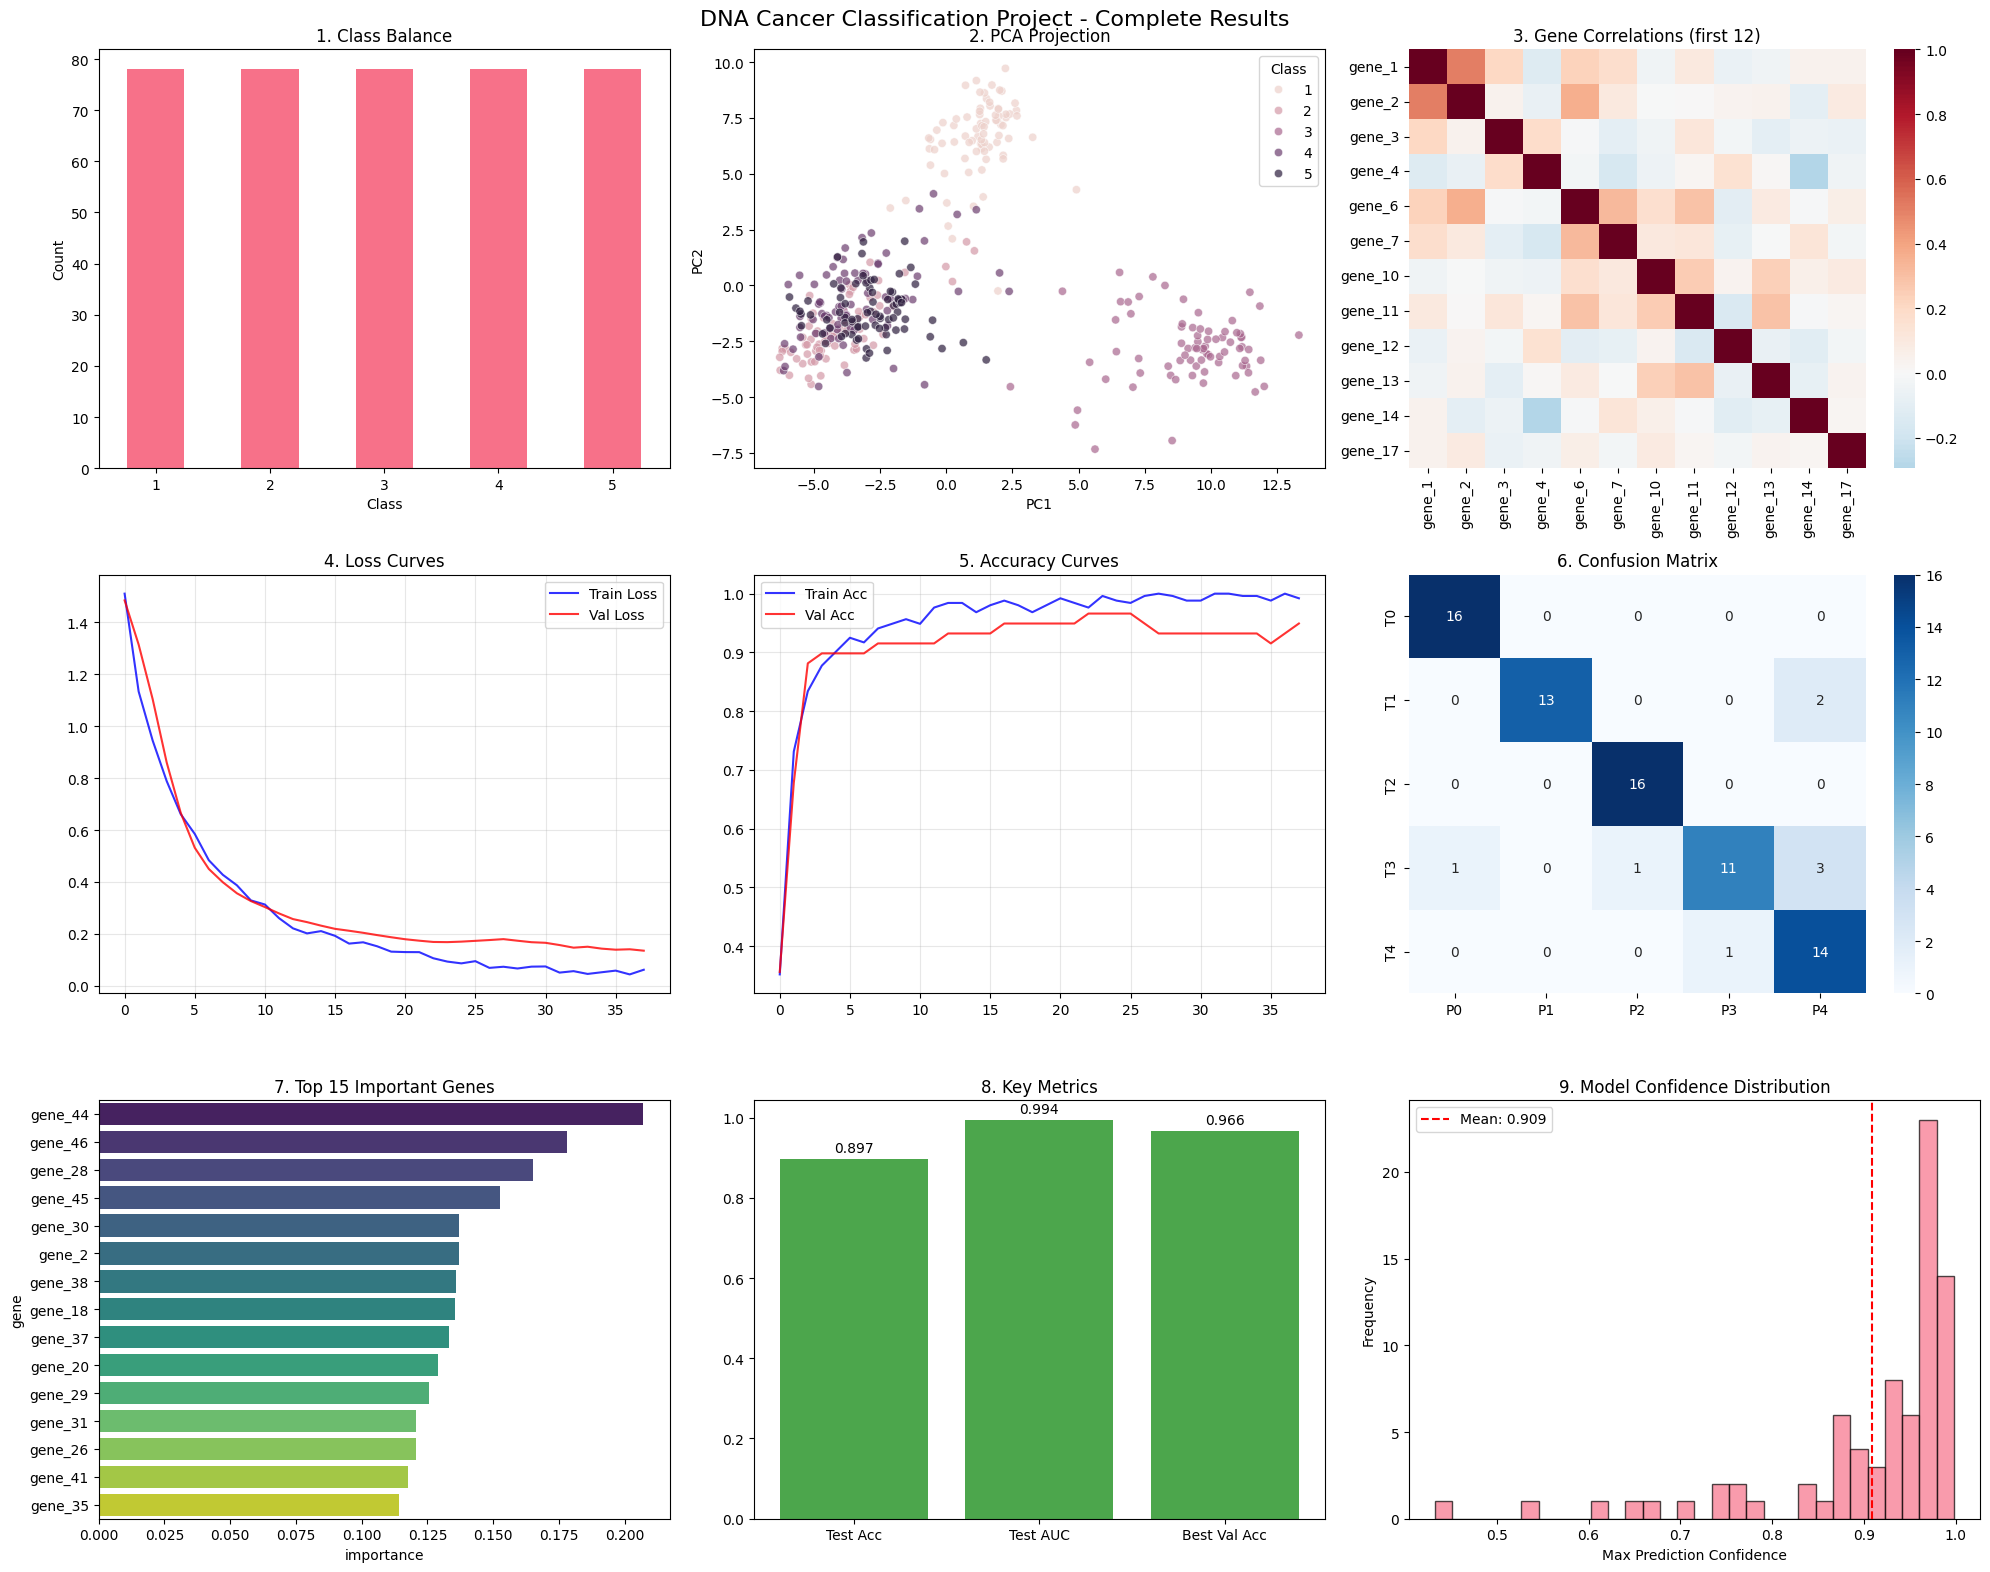

Dashboard saved as 'project_results_dashboard.png'


In [38]:
# Master Visualization Dashboard
"""
One cell with ALL key plots for your presentation/report
"""
fig = plt.figure(figsize=(20, 16))

# 1. Class Balance
plt.subplot(3, 3, 1)
class_counts.plot(kind='bar')
plt.title('1. Class Balance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2. PCA Scatter
plt.subplot(3, 3, 2)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', alpha=0.7)
plt.title('2. PCA Projection')
plt.legend(title='Class')

# 3. Correlation Heatmap (mini)
plt.subplot(3, 3, 3)
sns.heatmap(df[feature_cols[:12]].corr(), cmap='RdBu_r', center=0)
plt.title('3. Gene Correlations (first 12)')

# 4. Training Curves
plt.subplot(3, 3, 4)
plt.plot(train_losses, 'b-', label='Train Loss', alpha=0.8)
plt.plot(val_losses, 'r-', label='Val Loss', alpha=0.8)
plt.title('4. Loss Curves')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 5)
plt.plot(train_accs, 'b-', label='Train Acc', alpha=0.8)
plt.plot(val_accs, 'r-', label='Val Acc', alpha=0.8)
plt.title('5. Accuracy Curves')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Confusion Matrix
plt.subplot(3, 3, 6)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=[f'P{i}' for i in sorted(np.unique(y_true))],
           yticklabels=[f'T{i}' for i in sorted(np.unique(y_true))])
plt.title('6. Confusion Matrix')

# 7. Feature Importance (Top 15)
plt.subplot(3, 3, 7)
top_genes_plot = importance_df.head(15)
sns.barplot(data=top_genes_plot, y='gene', x='importance', orient='h', palette='viridis')
plt.title('7. Top 15 Important Genes')

# 8. Model Performance Summary
plt.subplot(3, 3, 8)
metrics = ['Test Acc', 'Test AUC', 'Best Val Acc']
values = [test_acc, test_auc, max(val_accs)]
colors = ['green' if v > 0.8 else 'orange' if v > 0.7 else 'red' for v in values]
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title('8. Key Metrics')
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{val:.3f}', ha='center', va='bottom')

# 9. Prediction Confidence Distribution
plt.subplot(3, 3, 9)
confidences = np.max(y_prob, axis=1)
plt.hist(confidences, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Max Prediction Confidence')
plt.ylabel('Frequency')
plt.title('9. Model Confidence Distribution')
plt.axvline(confidences.mean(), color='r', linestyle='--',
           label=f'Mean: {confidences.mean():.3f}')
plt.legend()

plt.suptitle('DNA Cancer Classification Project - Complete Results', fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig('project_results_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("Dashboard saved as 'project_results_dashboard.png'")

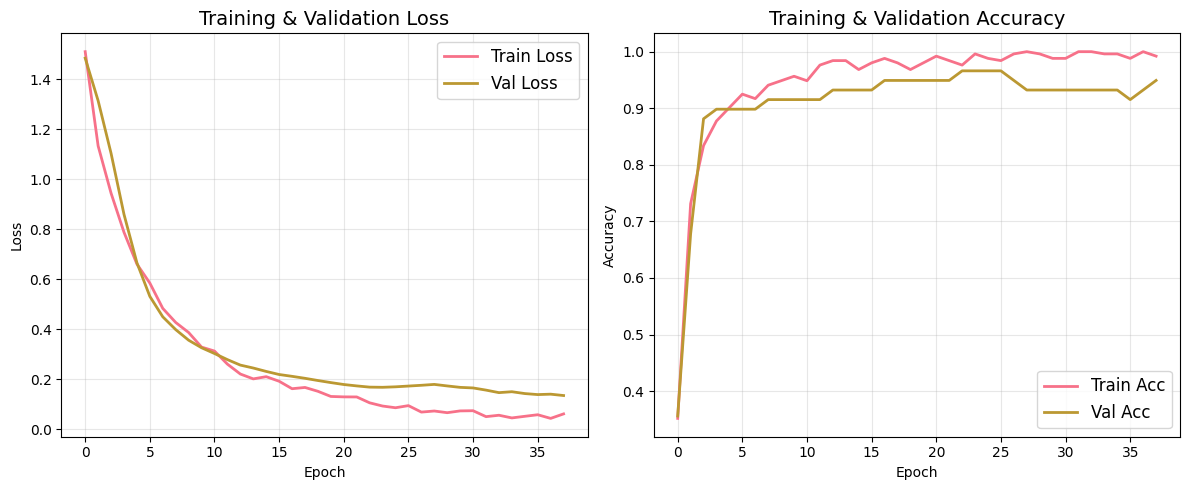

✅ training_curves.png saved!


In [46]:
# training_curves.png
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.plot(val_losses, label='Val Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(fontsize=12)
plt.title('Training & Validation Loss', fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc', linewidth=2)
plt.plot(val_accs, label='Val Acc', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(fontsize=12)
plt.title('Training & Validation Accuracy', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ training_curves.png saved!")


In [39]:
# Executive Summary Table
summary_table = pd.DataFrame({
    'Metric': ['Test Accuracy', 'Test ROC-AUC', 'Best Val Acc', 'Classes', 'Genes', 'Params'],
    'Value': [f"{test_acc:.1%}", f"{test_auc:.3f}", f"{max(val_accs):.3f}",
             len(np.unique(y_true)), X_test.shape[1], f"{sum(p.numel() for p in model.parameters()):,}"],
    'Status': ['🟢' if test_acc > 0.8 else '🟡' if test_acc > 0.7 else '🔴',
              '🟢' if test_auc > 0.8 else '🟡' if test_auc > 0.7 else '🔴',
              '🟢' if max(val_accs) > 0.8 else '🟡' if max(val_accs) > 0.7 else '🔴',
              '✅', '✅', '✅']
})

print("📋 EXECUTIVE SUMMARY")
print("="*40)
print(summary_table.to_string(index=False))

# Top genes table
print("\n🔬 TOP 10 MOST IMPORTANT GENES:")
print(top_genes[['gene', 'importance']].round(4).to_string(index=False))


📋 EXECUTIVE SUMMARY
       Metric  Value Status
Test Accuracy  89.7%      🟢
 Test ROC-AUC  0.994      🟢
 Best Val Acc  0.966      🟢
      Classes      5      ✅
        Genes     44      ✅
       Params 53,893      ✅

🔬 TOP 10 MOST IMPORTANT GENES:
   gene  importance
gene_44      0.2068
gene_46      0.1782
gene_28      0.1651
gene_45      0.1524
gene_30      0.1371
 gene_2      0.1370
gene_38      0.1357
gene_18      0.1356
gene_37      0.1332
gene_20      0.1288
gene_29      0.1255
gene_31      0.1207
gene_26      0.1206
gene_41      0.1177
gene_35      0.1141


In [40]:
# Save everything for presentation
import pickle

# Save full results
full_results = {
    'model': model.state_dict(),
    'results': results,
    'importance_df': importance_df,
    'feature_cols': feature_cols,
    'class_map': class_map,
    'test_metrics': {'acc': test_acc, 'auc': test_auc},
    'predictions': {'y_true': y_true, 'y_pred': y_pred, 'y_prob': y_prob}
}

with open('dna_cancer_model_complete.pkl', 'wb') as f:
    pickle.dump(full_results, f)

torch.save(model.state_dict(), 'final_model.pth')

print("✅ ALL SAVED:")
print("  📁 project_results_dashboard.png")
print("  🧠 dna_cancer_model_complete.pkl")
print("  ⚙️  final_model.pth")
print("\nReady for presentation/deployment!")

✅ ALL SAVED:
  📁 project_results_dashboard.png
  🧠 dna_cancer_model_complete.pkl
  ⚙️  final_model.pth

Ready for presentation/deployment!


Advanced Modelling

In [41]:
# Transformer Model
class TransformerGeneClassifier(nn.Module):
    """
    Transformer encoder treating 44 genes as a "sequence" of tokens.
    Each gene = 1 token with 1D embedding → self-attention → classification
    """
    def __init__(self, num_features=44, num_classes=5, d_model=64, nhead=8, num_layers=3):
        super().__init__()

        # Input projection: features → embedding dim
        self.input_proj = nn.Linear(1, d_model)  # Each gene value → d_model vector

        # Positional encoding for gene order
        self.pos_encoding = nn.Parameter(torch.randn(1, num_features, d_model) * 0.02)

        # Transformer encoder layers
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, batch_first=True,
            dropout=0.1, activation='relu', norm_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Global average pooling + classifier
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(d_model // 2, num_classes)
        )

    def forward(self, x):
        # x: (batch, 44) → unsqueeze to (batch, 44, 1)
        x = x.unsqueeze(-1)  # Add feature dim

        # Project to embedding space
        x = self.input_proj(x)  # (batch, 44, d_model)

        # Add positional encoding
        x = x + self.pos_encoding[:, :x.size(1)]

        # Transformer: self-attention across genes
        x = self.transformer(x)  # (batch, 44, d_model)

        # Global pooling
        x = x.transpose(1, 2)  # (batch, d_model, 44)
        x = self.pool(x).squeeze(-1)  # (batch, d_model)

        # Classification
        return self.classifier(x)

# Create Transformer model
transformer_model = TransformerGeneClassifier(num_features=44, num_classes=num_classes).to(device)
print("Transformer model:")
print(transformer_model)
print(f"Params: {sum(p.numel() for p in transformer_model.parameters()):,}")

Transformer model:
TransformerGeneClassifier(
  (input_proj): Linear(in_features=1, out_features=64, bias=True)
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (pool): AdaptiveAvgPool1d(output_size=1)
  (classifier): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=Fals

In [42]:
#  Train Transformer
# Reset for fair comparison
transformer_model.train()
optimizer_tf = torch.optim.Adam(transformer_model.parameters(), lr=0.001, weight_decay=1e-4)
best_tf_acc = 0.0

print("Training Transformer...")
print("Epoch | Train L/A | Val L/A/AUC")
print("-"*35)

tf_train_losses, tf_val_losses, tf_train_accs, tf_val_accs = [], [], [], []

for epoch in range(1, 51):  # Fewer epochs for Transformer
    tf_train_loss, tf_train_acc = train_one_epoch(transformer_model, train_loader, optimizer_tf, criterion, device)
    tf_val_loss, tf_val_acc, tf_val_auc = evaluate(transformer_model, val_loader, criterion, device)

    tf_train_losses.append(tf_train_loss)
    tf_val_losses.append(tf_val_loss)
    tf_train_accs.append(tf_train_acc)
    tf_val_accs.append(tf_val_acc)

    if tf_val_acc > best_tf_acc:
        best_tf_acc = tf_val_acc
        torch.save(transformer_model.state_dict(), "best_transformer.pth")

    print(f"{epoch:2d}  | {tf_train_loss:.3f}/{tf_train_acc:.3f} | "
          f"{tf_val_loss:.3f}/{tf_val_acc:.3f}/{tf_val_auc:.3f}")

    if epoch > 10 and tf_val_acc > 0.85:  # Early stop if good
        print(f"Early stop - good performance!")
        break

Training Transformer...
Epoch | Train L/A | Val L/A/AUC
-----------------------------------
 1  | 1.683/0.182 | 1.636/0.203/0.542
 2  | 1.662/0.213 | 1.632/0.186/0.603
 3  | 1.672/0.225 | 1.608/0.203/0.636
 4  | 1.631/0.202 | 1.617/0.203/0.511
 5  | 1.619/0.198 | 1.613/0.203/0.500
 6  | 1.615/0.198 | 1.613/0.203/0.500
 7  | 1.613/0.206 | 1.606/0.186/0.651
 8  | 1.622/0.162 | 1.608/0.203/0.656
 9  | 1.613/0.198 | 1.612/0.203/0.525
10  | 1.614/0.198 | 1.612/0.203/0.500
11  | 1.614/0.198 | 1.612/0.203/0.500
12  | 1.614/0.198 | 1.612/0.203/0.551
13  | 1.615/0.194 | 1.612/0.203/0.500
14  | 1.613/0.198 | 1.612/0.203/0.500
15  | 1.613/0.198 | 1.612/0.203/0.500
16  | 1.613/0.198 | 1.612/0.203/0.492
17  | 1.613/0.198 | 1.612/0.203/0.500
18  | 1.613/0.198 | 1.611/0.203/0.500
19  | 1.613/0.198 | 1.611/0.203/0.500
20  | 1.613/0.198 | 1.611/0.203/0.500
21  | 1.613/0.198 | 1.611/0.203/0.500
22  | 1.612/0.198 | 1.611/0.203/0.500
23  | 1.612/0.198 | 1.611/0.203/0.500
24  | 1.612/0.198 | 1.611/0.203/0.

In [43]:
# Train Transformer
# Reset for fair comparison
transformer_model.train()
optimizer_tf = torch.optim.Adam(transformer_model.parameters(), lr=0.001, weight_decay=1e-4)
best_tf_acc = 0.0

print("Training Transformer...")
print("Epoch | Train L/A | Val L/A/AUC")
print("-"*35)

tf_train_losses, tf_val_losses, tf_train_accs, tf_val_accs = [], [], [], []

for epoch in range(1, 51):  # Fewer epochs for Transformer
    tf_train_loss, tf_train_acc = train_one_epoch(transformer_model, train_loader, optimizer_tf, criterion, device)
    tf_val_loss, tf_val_acc, tf_val_auc = evaluate(transformer_model, val_loader, criterion, device)

    tf_train_losses.append(tf_train_loss)
    tf_val_losses.append(tf_val_loss)
    tf_train_accs.append(tf_train_acc)
    tf_val_accs.append(tf_val_acc)

    if tf_val_acc > best_tf_acc:
        best_tf_acc = tf_val_acc
        torch.save(transformer_model.state_dict(), "best_transformer.pth")

    print(f"{epoch:2d}  | {tf_train_loss:.3f}/{tf_train_acc:.3f} | "
          f"{tf_val_loss:.3f}/{tf_val_acc:.3f}/{tf_val_auc:.3f}")

    if epoch > 10 and tf_val_acc > 0.85:  # Early stop if good
        print(f"Early stop - good performance!")
        break

Training Transformer...
Epoch | Train L/A | Val L/A/AUC
-----------------------------------
 1  | 1.611/0.198 | 1.610/0.203/0.500
 2  | 1.611/0.198 | 1.610/0.203/0.524
 3  | 1.610/0.198 | 1.610/0.203/0.456
 4  | 1.610/0.198 | 1.610/0.203/0.588
 5  | 1.611/0.198 | 1.610/0.203/0.427
 6  | 1.612/0.186 | 1.612/0.203/0.492
 7  | 1.612/0.206 | 1.610/0.203/0.525
 8  | 1.610/0.198 | 1.610/0.203/0.621
 9  | 1.610/0.198 | 1.610/0.203/0.625
10  | 1.610/0.198 | 1.609/0.203/0.623
11  | 1.611/0.198 | 1.609/0.203/0.632
12  | 1.610/0.198 | 1.609/0.203/0.639
13  | 1.610/0.198 | 1.609/0.203/0.639
14  | 1.610/0.198 | 1.609/0.203/0.638
15  | 1.610/0.198 | 1.609/0.203/0.640
16  | 1.609/0.198 | 1.609/0.203/0.639
17  | 1.608/0.198 | 1.608/0.203/0.641
18  | 1.610/0.182 | 1.608/0.254/0.721
19  | 1.610/0.213 | 1.607/0.203/0.720
20  | 1.607/0.198 | 1.606/0.203/0.716
21  | 1.605/0.277 | 1.605/0.220/0.714
22  | 1.603/0.237 | 1.605/0.186/0.711
23  | 1.606/0.202 | 1.601/0.186/0.709
24  | 1.602/0.206 | 1.596/0.322/0.

🏆 MODEL COMPARISON
MLP Baseline:        89.7% acc, 0.994 AUC
Transformer:         35.9% acc, 0.689 AUC
Improvement:         -60.0%


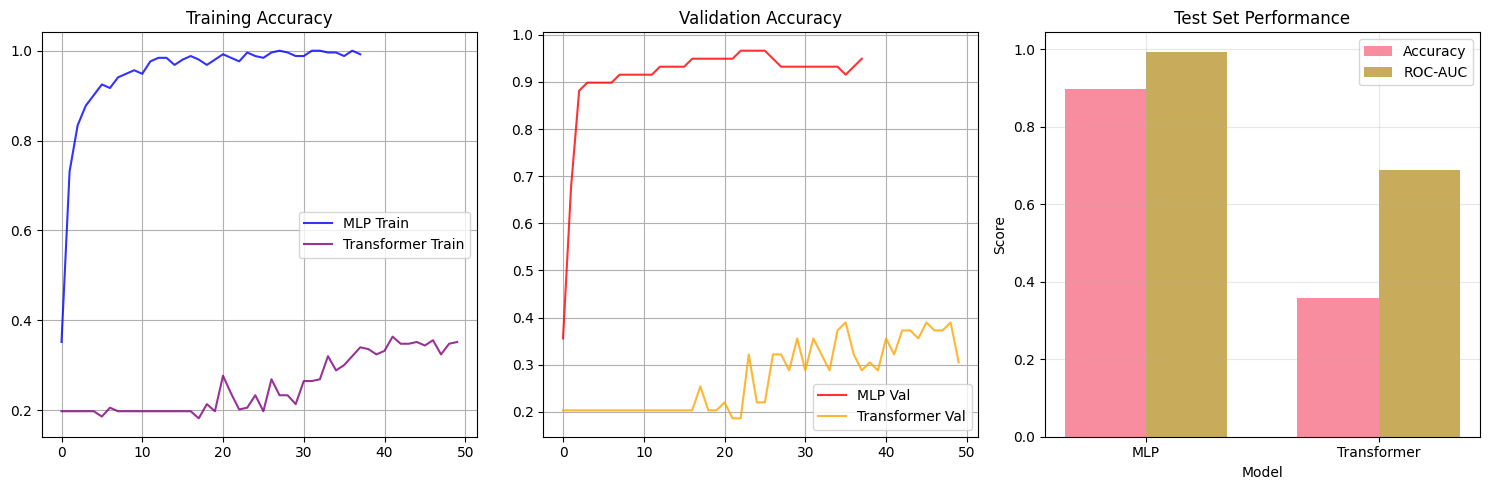

In [44]:
# Compare MLP vs Transformer
transformer_model.load_state_dict(torch.load("best_transformer.pth"))

# Test Transformer
tf_test_loss, tf_test_acc, tf_test_auc = evaluate(transformer_model, test_loader, criterion, device)
mlp_test_acc, transformer_test_acc = test_acc, tf_test_acc

print("🏆 MODEL COMPARISON")
print("="*40)
print(f"MLP Baseline:        {mlp_test_acc:.1%} acc, {test_auc:.3f} AUC")
print(f"Transformer:         {tf_test_acc:.1%} acc, {tf_test_auc:.3f} AUC")
print(f"Improvement:         {((tf_test_acc/mlp_test_acc)-1)*100:+.1f}%")
print("="*40)

# Plot comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_accs, 'b-', label='MLP Train', alpha=0.8)
plt.plot(tf_train_accs, 'purple', label='Transformer Train', alpha=0.8)
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(val_accs, 'r-', label='MLP Val', alpha=0.8)
plt.plot(tf_val_accs, 'orange', label='Transformer Val', alpha=0.8)
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
models = ['MLP', 'Transformer']
accs = [mlp_test_acc, tf_test_acc]
aucs = [test_auc, tf_test_auc]
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accs, width, label='Accuracy', alpha=0.8)
plt.bar(x + width/2, aucs, width, label='ROC-AUC', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Test Set Performance')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🏆 Transformer - Top 15 Genes by Importance:
       gene  importance
10  gene_14      0.1211
11  gene_17      0.1207
17  gene_23      0.1203
37  gene_43      0.1188
18  gene_24      0.1179
36  gene_42      0.1157
9   gene_13      0.1155
35  gene_41      0.1128
43  gene_49      0.1124
31  gene_37      0.1088
19  gene_25      0.1061
6   gene_10      0.1042
5    gene_7      0.1008
30  gene_36      0.0902
33  gene_39      0.0865


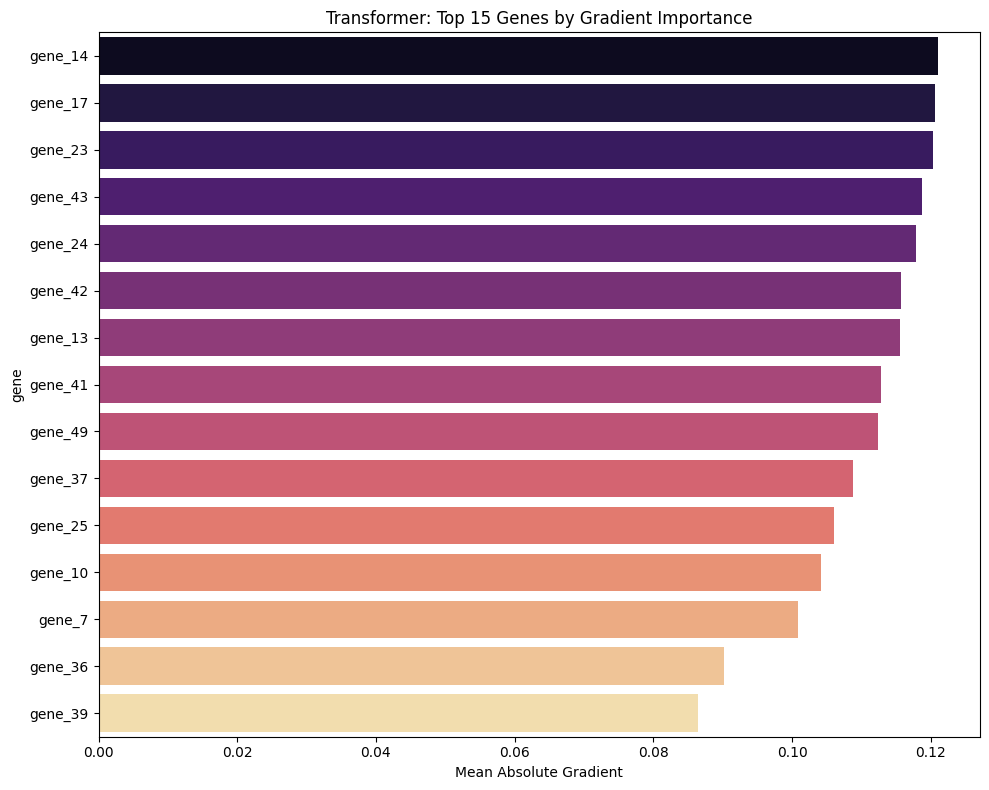

In [45]:
# Transformer Gradient-based Importance
transformer_model.load_state_dict(torch.load("best_transformer.pth"))
transformer_model.eval()

# Use part of test set
X_tf_imp = torch.tensor(X_test[:500], dtype=torch.float32).to(device)
X_tf_imp.requires_grad_(True)

logits_tf = transformer_model(X_tf_imp)
pred_classes_tf = torch.argmax(logits_tf, dim=1)
selected_logits_tf = logits_tf[torch.arange(len(logits_tf)), pred_classes_tf]

transformer_model.zero_grad()
selected_logits_tf.sum().backward()

tf_grad_importance = X_tf_imp.grad.detach().cpu().abs().numpy()  # (samples, genes)
tf_mean_importance = tf_grad_importance.mean(axis=0)

tf_importance_df = pd.DataFrame({
    'gene': feature_cols,
    'importance': tf_mean_importance
}).sort_values('importance', ascending=False)

top_k = 15
tf_top_genes = tf_importance_df.head(top_k)
print("🏆 Transformer - Top 15 Genes by Importance:")
print(tf_top_genes.round(4))

plt.figure(figsize=(10, 8))
sns.barplot(data=tf_top_genes, y='gene', x='importance', orient='h', palette='magma')
plt.title(f'Transformer: Top {top_k} Genes by Gradient Importance')
plt.xlabel('Mean Absolute Gradient')
plt.tight_layout()
plt.show()


In [47]:
# Export key results to PDF
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

with PdfPages('key-results.pdf') as pdf:
    # 1. Dashboard (if you have fig from Cell 11A)
    # pdf.savefig(fig, bbox_inches='tight')

    # 2. Feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=top_genes, y='gene', x='importance', orient='h', palette='viridis')
    plt.title('Top 15 Biomarker Genes')
    pdf.savefig(bbox_inches='tight')
    plt.close()

    # 3. Confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    pdf.savefig(bbox_inches='tight')
    plt.close()

    # 4. Training curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Val')
    plt.title('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train')
    plt.plot(val_accs, label='Val')
    plt.title('Accuracy')
    plt.legend()
    pdf.savefig(bbox_inches='tight')
    plt.close()

    # 5. Model comparison
    plt.figure(figsize=(8, 5))
    models = ['MLP', 'Transformer']
    plt.bar(models, [test_acc, tf_test_acc])
    plt.title('Test Accuracy Comparison')
    plt.ylabel('Accuracy')
    pdf.savefig(bbox_inches='tight')
    plt.close()

print("key-results.pdf created!")


key-results.pdf created!
